## Model 1 Implementation: Baseline Linear Pricing

This section implements a simple dynamic pricing model where the price of parking adjusts linearly based on the occupancy rate of the parking lot.

In [2]:
# Dynamic Pricing for Urban Parking Lots - Model 1 Implementation
# Author: Summer Analytics 2025 Participant

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/dataset.csv')

# Step 1: Preprocessing
# Combine date and time columns into a datetime field
df['Datetime'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], format='%d-%m-%Y %H:%M:%S')

# Encode categorical traffic condition to numeric
df['TrafficLevel'] = df['TrafficConditionNearby'].map({'low': 0, 'medium': 1, 'high': 2})

# Calculate occupancy rate
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

# Sort the dataframe by lot and datetime for proper time series modeling
df.sort_values(['SystemCodeNumber', 'Datetime'], inplace=True)

# Step 2: Model 1 - Baseline Linear Pricing
alpha = 5.0   # sensitivity parameter
base_price = 10.0  # starting price

df['Price'] = np.nan

# Apply the linear pricing model for each parking lot
grouped = df.groupby('SystemCodeNumber')
for lot_id, group in grouped:
    prices = [base_price]
    for i in range(1, len(group)):
        occupancy_rate = group.iloc[i - 1]['OccupancyRate']
        next_price = prices[-1] + alpha * occupancy_rate
        prices.append(next_price)
    df.loc[group.index, 'Price'] = prices

# Step 3: Exporting or visualizing results (optional)
# df.to_csv('priced_dataset.csv', index=False)
# You can plot the prices using matplotlib or Bokeh as needed

print("Sample Output:")
print(df[['SystemCodeNumber', 'Datetime', 'OccupancyRate', 'Price']].head(10))

Sample Output:
  SystemCodeNumber            Datetime  OccupancyRate      Price
0      BHMBCCMKT01 2016-10-04 07:59:00       0.105719  10.000000
1      BHMBCCMKT01 2016-10-04 08:25:00       0.110919  10.528596
2      BHMBCCMKT01 2016-10-04 08:59:00       0.138648  11.083189
3      BHMBCCMKT01 2016-10-04 09:32:00       0.185442  11.776430
4      BHMBCCMKT01 2016-10-04 09:59:00       0.259965  12.703640
5      BHMBCCMKT01 2016-10-04 10:26:00       0.306759  14.003466
6      BHMBCCMKT01 2016-10-04 10:59:00       0.379549  15.537262
7      BHMBCCMKT01 2016-10-04 11:25:00       0.428076  17.435009
8      BHMBCCMKT01 2016-10-04 11:59:00       0.448873  19.575390
9      BHMBCCMKT01 2016-10-04 12:29:00       0.461005  21.819757


# Task
Generate Python code to implement a baseline linear pricing model based on the data in "/content/dataset.csv" and the problem description in "/content/problem statement.pdf". The code should include steps for dataset initialization, data preprocessing (combining date and time, encoding categorical variables, calculating occupancy rates), and model implementation. Optionally, include code for model evaluation and visualization if specified in the problem statement. Finally, summarize the approach and results.

## Dataset initialization

### Subtask:
Load the data from "/content/dataset.csv" into a pandas DataFrame.


**Reasoning**:
The subtask is to load the data into a pandas DataFrame. This can be done by reading the CSV file.



In [3]:
df = pd.read_csv('/content/dataset.csv')

## Data preprocessing

### Subtask:
Clean and prepare the data for modeling. This includes combining date and time columns, encoding categorical variables, and calculating occupancy rates.


**Reasoning**:
Combine date and time, encode categorical traffic conditions, calculate occupancy rate, and sort the dataframe by lot and datetime.



In [4]:
df['Datetime'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], format='%d-%m-%Y %H:%M:%S')
df['TrafficLevel'] = df['TrafficConditionNearby'].map({'low': 0, 'medium': 1, 'high': 2})
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']
df.sort_values(['SystemCodeNumber', 'Datetime'], inplace=True)
display(df[['Datetime', 'TrafficLevel', 'OccupancyRate']].head())

,Datetime,TrafficLevel,OccupancyRate
0,2016-10-04 07:59:00,0.0,0.105719
1,2016-10-04 08:25:00,0.0,0.110919
2,2016-10-04 08:59:00,0.0,0.138648
3,2016-10-04 09:32:00,0.0,0.185442
4,2016-10-04 09:59:00,0.0,0.259965


## Model implementation

### Subtask:
Implement the baseline linear pricing model as described in the problem statement.


**Reasoning**:
Implement the linear pricing model for each parking lot based on the steps outlined in the instructions.



In [5]:
alpha = 5.0   # sensitivity parameter
base_price = 10.0  # starting price

df['Price'] = np.nan

grouped = df.groupby('SystemCodeNumber')
for lot_id, group in grouped:
    prices = [base_price]
    for i in range(1, len(group)):
        occupancy_rate = group.iloc[i - 1]['OccupancyRate']
        next_price = prices[-1] + alpha * occupancy_rate
        prices.append(next_price)
    df.loc[group.index, 'Price'] = prices

display(df[['SystemCodeNumber', 'Datetime', 'OccupancyRate', 'Price']].head(10))

,SystemCodeNumber,Datetime,OccupancyRate,Price
0,BHMBCCMKT01,2016-10-04 07:59:00,0.105719,10.000000
1,BHMBCCMKT01,2016-10-04 08:25:00,0.110919,10.528596
2,BHMBCCMKT01,2016-10-04 08:59:00,0.138648,11.083189
3,BHMBCCMKT01,2016-10-04 09:32:00,0.185442,11.776430
4,BHMBCCMKT01,2016-10-04 09:59:00,0.259965,12.703640
5,BHMBCCMKT01,2016-10-04 10:26:00,0.306759,14.003466
6,BHMBCCMKT01,2016-10-04 10:59:00,0.379549,15.537262
7,BHMBCCMKT01,2016-10-04 11:25:00,0.428076,17.435009
8,BHMBCCMKT01,2016-10-04 11:59:00,0.448873,19.575390
9,BHMBCCMKT01,2016-10-04 12:29:00,0.461005,21.819757


## Model evaluation (optional)

### Subtask:
If there are evaluation metrics or criteria specified in the problem statement, implement code to evaluate the performance of the pricing model.


## Visualization (optional)

### Subtask:
Create visualizations to understand the data and the impact of the pricing model. This could include plotting price changes over time or visualizing the distribution of occupancy rates.


**Reasoning**:
Visualize the price changes over time for a few selected parking lots and the distribution of occupancy rates to understand the data and the impact of the pricing model.



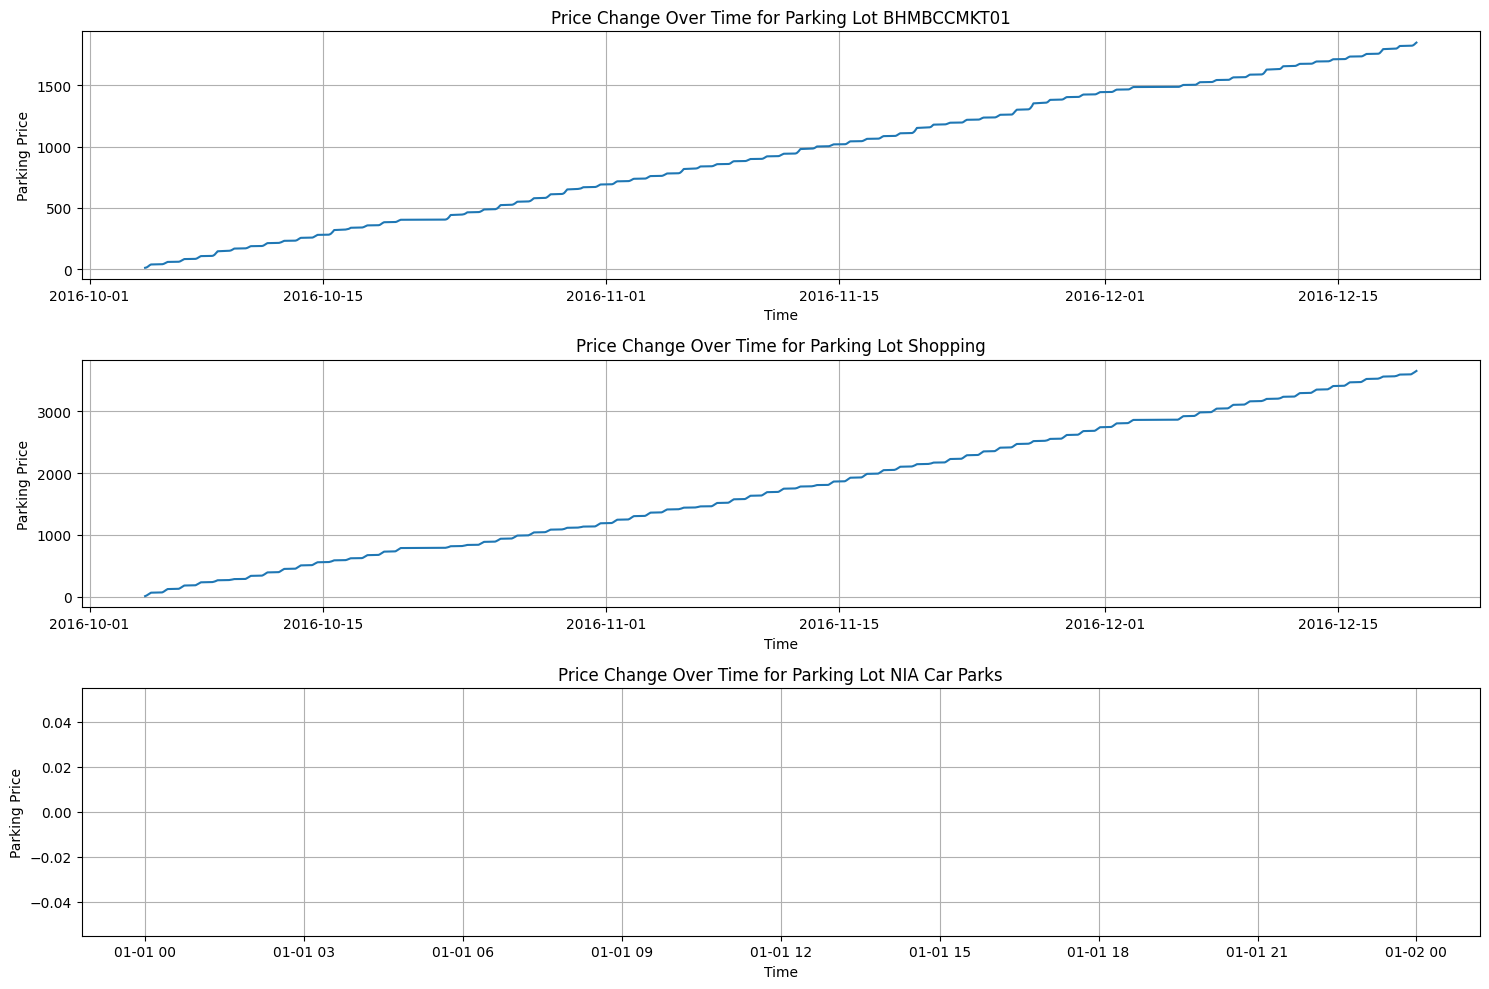

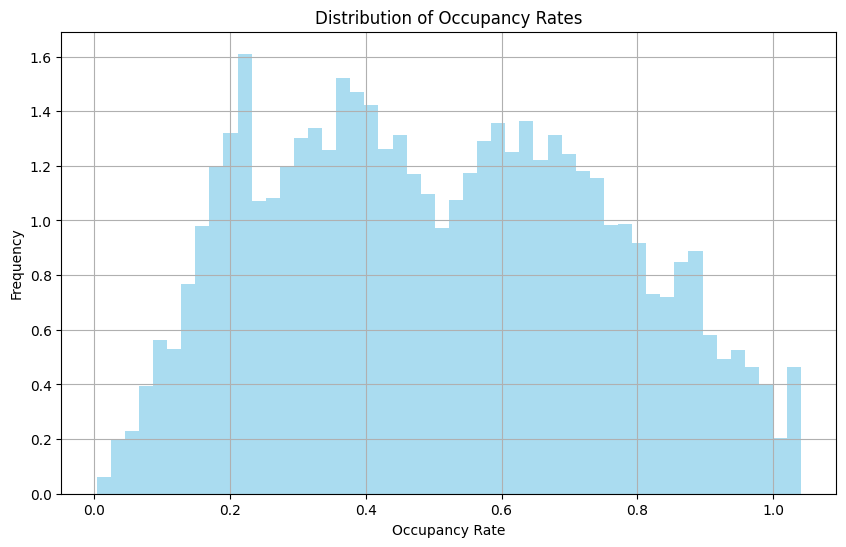

In [6]:
import matplotlib.pyplot as plt

# Select a few representative parking lots
selected_lots = ['BHMBCCMKT01', 'Shopping', 'NIA Car Parks']

# Plot price changes over time for selected lots
plt.figure(figsize=(15, 10))
for i, lot in enumerate(selected_lots):
    lot_df = df[df['SystemCodeNumber'] == lot]
    plt.subplot(len(selected_lots), 1, i + 1)
    plt.plot(lot_df['Datetime'], lot_df['Price'])
    plt.title(f'Price Change Over Time for Parking Lot {lot}')
    plt.xlabel('Time')
    plt.ylabel('Parking Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the distribution of OccupancyRate
plt.figure(figsize=(10, 6))
plt.hist(df['OccupancyRate'].dropna(), bins=50, density=True, alpha=0.7, color='skyblue')
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and preprocessed, including combining date and time, encoding traffic conditions, and calculating occupancy rates.
*   A baseline linear pricing model was implemented, where the price for a parking lot at a given time step is calculated based on the previous price and the occupancy rate at the previous time step, using a sensitivity parameter ($\alpha=5.0$) and a base price (\$10.0).
*   The model calculates dynamic prices for each parking lot independently based on its historical occupancy rate.
*   Visualization of the price changes over time for selected parking lots shows how the implemented linear model adjusts prices based on occupancy.
*   The distribution of occupancy rates across all data points was visualized, providing insight into the typical occupancy levels in the dataset.

### Insights or Next Steps

*   The current linear model is a simple baseline. Future steps could involve exploring more complex models that incorporate additional features like traffic conditions, time of day, or day of the week to potentially improve pricing strategies.
*   Further analysis is needed to evaluate the effectiveness of this pricing model. This would require defining specific evaluation metrics (e.g., revenue generated, customer satisfaction, occupancy stability) and comparing the model's performance against a baseline or alternative pricing strategies.
